<h1> <center> Applied AI - Multi-class sentiment analysis </center> </h1>

## Exploring the Dataset

Let's take a quick look at the reviews: how many there are, how the sentiments are distributed, what the data looks like, and some basic characteristics of the text.


In [2]:
import pandas as pd
import numpy as np


In [3]:
path = r"C:\Users\Harashaa Harshini\OneDrive\Desktop\MSC Assignments\applied AI"

In [4]:
# Load the IMDB dataset and show the first few rows

file_path = path + "\\IMDB Dataset.csv"
df = pd.read_csv(file_path)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
# Print total number of reviews in the dataset
print(len(df))

50000


In [6]:
# Count of positive and negative reviews

counts = df['sentiment'].value_counts()
print(counts)

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


# 🪄 Data Pre-Processing

## 1️⃣🧹 Text Cleaning

**Steps:**
1. Remove HTML tags (e.g., `<br />`)
2. Remove special characters, punctuation, and numbers where irrelevant
3. Convert all text to lowercase
4. Remove extra whitespace

**Rationale:**  
Standardizes input for all models and reduces noise for classical machine learning methods.


In [7]:
import re

In [8]:
# Function to clean text data for preprocessing
def clean_text(text):
    """
    This function takes a text string as input and performs the cleaning steps.
    
    """
    text = re.sub(r'<.*?>', '', text)             # remove HTML commands
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)      # remove non-alphabetic characters
    text = text.lower()                           # convert to lowercase
    text = re.sub(r'\s+', ' ', text).strip()      # remove extra spaces
    return text

# Apply the cleaning function to the 'review' column

df['clean_review'] = df['review'].apply(clean_text)
df.head()


,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically there s a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei s love in the time of money is a...


## 2️⃣ Tokenization

We are trying three different tokenization strategies to ensure compatibility with each model’s input requirements.



### Classical ML (Naïve Bayes, SVM) : 
Split text into words (word-level tokens).  

In [12]:
from sklearn.feature_extraction.text import CountVectorizer 

vectorizer = CountVectorizer()
vectorizer.fit(df['clean_review'])

# tokenize all reviews 
df['classical_tokens'] = df['clean_review'].apply( lambda x: vectorizer.build_tokenizer()(x))


### Deep Learning (LSTM):
Use Keras Tokenizer to convert words into sequences.

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.preprocessing.sequence import pad_sequences

keras_tokenizer = Tokenizer(num_words = 5000, oov_token = '<oov>')
keras_tokenizer.fit_on_texts(df['clean_review'])

# Convert all reviews to sequences and pad them

sequences = keras_tokenizer.texts_to_sequences(df['clean_review'])
padded_sequences = pad_sequences(sequences, padding = 'post', maxlen = 50)
df['lstm_tokens'] = list(padded_sequences)


### BERT: 
Use `bert-base-uncased` tokenizer (handles subwords and special tokens). 

In [14]:

from transformers import BertTokenizer

bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

#tokenize all reviews with subwords and special tokons

df['bert_tokens'] = df['clean_review'].apply(lambda x: bert_tokenizer.tokenize(x))
df['bert_tokens_id'] = df['clean_review'].apply(lambda x : bert_tokenizer.encode(x, add_special_tokens = True))
                                                

Token indices sequence length is longer than the specified maximum sequence length for this model (604 > 512). Running this sequence through the model will result in indexing errors


In [11]:
df.head()

,review,sentiment,clean_review,classical_tokens,lstm_tokens,bert_tokens,bert_tokens_id
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione...","[495, 23, 628, 3, 76, 241, 18, 8, 70, 1, 639, ...","[one, of, the, other, reviewers, has, mentione...","[101, 2028, 1997, 1996, 2060, 15814, 2038, 385..."
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,"[wonderful, little, production, the, filming, ...","[1008, 5, 2, 2875, 62, 249, 73, 357, 2, 2178, ...","[a, wonderful, little, production, the, filmin...","[101, 1037, 6919, 2210, 2537, 1996, 7467, 6028..."
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[thought, this, was, wonderful, way, to, spend...","[11, 55, 1313, 6, 1243, 177, 43, 1235, 1408, 3...","[i, thought, this, was, a, wonderful, way, to,...","[101, 1045, 2245, 2023, 2001, 1037, 6919, 2126..."
3,Basically there's a family where a little boy ...,negative,basically there s a family where a little boy ...,"[basically, there, family, where, little, boy,...","[71, 28, 3317, 18, 27, 4180, 62, 453, 4072, 31...","[basically, there, s, a, family, where, a, lit...","[101, 10468, 2045, 1055, 1037, 2155, 2073, 103..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei s love in the time of money is a...,"[petter, mattei, love, in, the, time, of, mone...","[90, 5, 2, 80, 71, 2462, 2, 115, 7, 50, 458, 4...","[pet, ##ter, matt, ##ei, s, love, in, the, tim...","[101, 9004, 3334, 4717, 7416, 1055, 2293, 1999..."


## 3️⃣ Stopword Handling

**Approaches:**

- **Classical ML (Naïve Bayes, SVM):** Remove stopwords to reduce noise.  
- **Deep Learning (LSTM, BERT):** Keep stopwords to preserve context and semantic meaning.  

**Rationale:**  
Classical models benefit from a reduced feature space; deep models learn contextual importance and can understand sentence meaning even with stopwords.


In [16]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stopwords

def remove_stopwords_classical (text):
    tokens = text.split()
    filtered_tokens = [w for w in tokens if w not in sklearn_stopwords]
    return ' '.join(filtered_tokens)

df['clean_no_stopwords'] = df['clean_review'].apply(remove_stopwords_classical)

df['clean_with_stopwords'] = df['clean_review'] 
     

## 4️⃣ Lemmatization / Stemming

**Approaches:**

 - **Naïve Bayes/SVM:** Apply lemmatization to reduce inflectional forms.
 - **LSTM/BERT:** Skip lemmatization to maintain word forms for embeddings.

**Rationale:** 
Improves feature consistency for classical models; preserves pre-trained embeddings’ vocabulary for deep models.

In [17]:
import nltk
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text (text) :
    tokens = text.split()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

df['lemmatized_text'] = df['clean_no_stopwords'].apply(lemmatize_text)


## 5️⃣ Sequence Handling

**Rationale:**  
Uniform input sizes are required for neural networks, while classical models need vectorized features for effective learning.


**Naïve Bayes / SVM:** 
Convert tokenized text into TF-IDF vectors for classical machine learning models. 

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    max_features = 10000,
    ngram_range=(1, 2),       # unigrams + bigrams
    stop_words='english')
x_tfidf = tfidf_vectorizer.fit_transform(df['clean_no_stopwords'])
print('Tf-Idf shape: ', x_tfidf.shape)


Tf-Idf shape:  (50000, 10000)


## 6️⃣ Label Encoding

**Approaches:**

- **Binary Sentiment Classification:**  
  Map classes to integers:  
  - `0` → negative  
  - `1` → positive  

**Rationale:**  
- Converts categorical labels into numerical format required by machine learning or deep learning models.


In [19]:
from sklearn.preprocessing import LabelEncoder

binary_map = {"negative":0, "positive":1}
df['sentiment_binary'] = df['sentiment'].map(binary_map)
print(df[['sentiment','sentiment_binary']])

      sentiment  sentiment_binary
0      positive                 1
1      positive                 1
2      positive                 1
3      negative                 0
4      positive                 1
...         ...               ...
49995  positive                 1
49996  negative                 0
49997  negative                 0
49998  negative                 0
49999  negative                 0

[50000 rows x 2 columns]


## 7️⃣ Train-Test Split

80–20 split (or 70–15–15 with validation set)

Ensure class balance is maintained

In [20]:
from sklearn.model_selection import train_test_split

# Features: can be text or preprocessed tokens
X = df['clean_review']        # or df['lstm_tokens'], df['classical_text'], etc.
y = df['sentiment_binary']    # binary labels: 0=negative, 1=positive

# 80-20 split with stratification to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))
print("Class distribution in train:\n", y_train.value_counts())
print("Class distribution in test:\n", y_test.value_counts())

Training set size: 40000
Test set size: 10000
Class distribution in train:
 sentiment_binary
1    20000
0    20000
Name: count, dtype: int64
Class distribution in test:
 sentiment_binary
0    5000
1    5000
Name: count, dtype: int64


### 📊 Sentiment Class Distribution

Visualizes the balance between positive and negative reviews using a bar chart.  


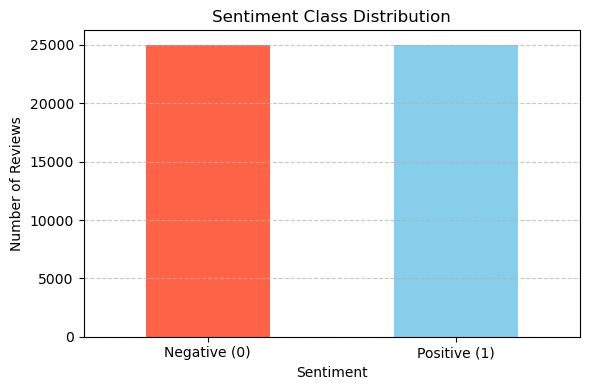

Bar graph saved successfully at: C:\Users\Harashaa Harshini\OneDrive\Desktop\MSC Assignments\applied AI\class_distribution.png


In [21]:
import matplotlib.pyplot as plt

# Count occurrences of each sentiment class
class_counts = df['sentiment_binary'].value_counts()

save = path + "\class_distribution.png"

# Bar chart
plt.figure(figsize=(6,4))
class_counts.plot(kind='bar', color=['tomato', 'skyblue'])
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(ticks=[0, 1], labels=['Negative (0)', 'Positive (1)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Save figure
plt.tight_layout()
plt.savefig(save, dpi=300)
plt.show()
print(f"Bar graph saved successfully at: {save}")

### 📏 Review Length Distribution

Shows how many words are in each review to justify sequence length choice for LSTM/BERT.


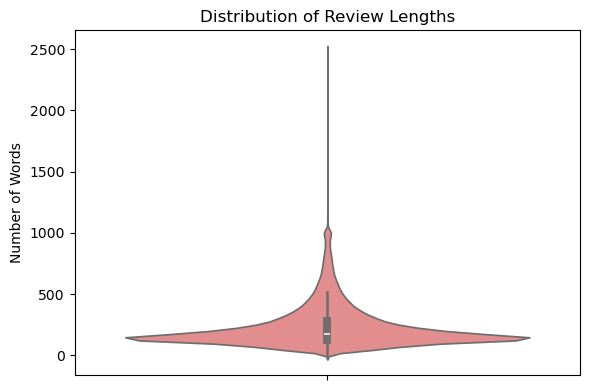

Violin plot saved successfully at: C:\Users\Harashaa Harshini\OneDrive\Desktop\MSC Assignments\applied AI\review_length_distribution.png


In [19]:
import seaborn as sns 

# Count number of words in each cleaned review
df['review_length'] = df['clean_review'].apply(lambda x: len(x.split()))

# Optional violin plot to visualize spread
plt.figure(figsize=(6,4))
sns.violinplot(y=df['review_length'], color='lightcoral')
plt.title("Distribution of Review Lengths")
plt.ylabel("Number of Words")


# Save violin plot separately
save_violin = path + "\\review_length_distribution.png"
plt.tight_layout()
plt.savefig(save_violin, dpi=300)
plt.show()

print(f"Violin plot saved successfully at: {save_violin}")


### ☁️ Word Clouds for Sentiment Classes

- **Positive Reviews:** Shows the most frequent words in positive reviews.  
- **Negative Reviews:** Shows the most frequent words in negative reviews.  

Purpose: Helps identify sentiment-specific vocabulary at a glance.


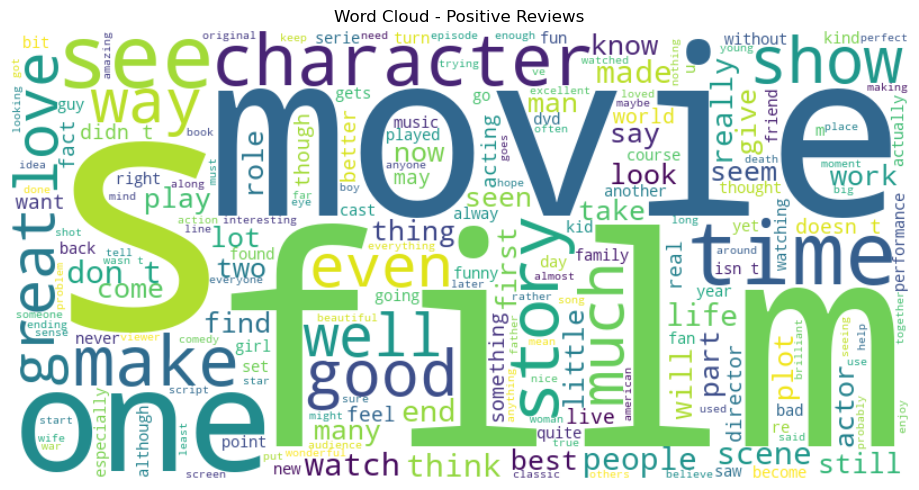

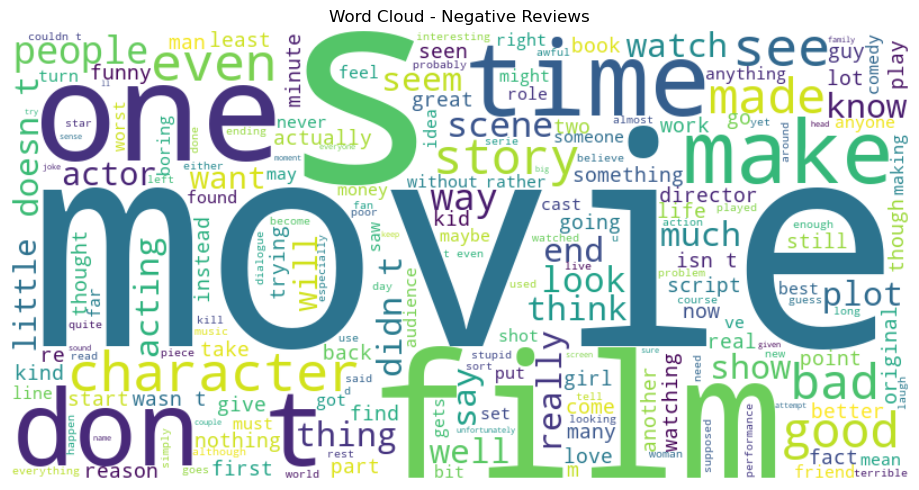

Positive word cloud saved at: C:\Users\Harashaa Harshini\OneDrive\Desktop\MSC Assignments\applied AI\wordcloud_positive.png
Negative word cloud saved at: C:\Users\Harashaa Harshini\OneDrive\Desktop\MSC Assignments\applied AI\wordcloud_negative.png


In [20]:
from wordcloud import WordCloud

save_pos = path + "\\wordcloud_positive.png"
save_neg = path + "\\wordcloud_negative.png"

# -------------------------------
# Generate Word Clouds
# -------------------------------
# Positive reviews
text_pos = " ".join(df[df['sentiment_binary']==1]['clean_review'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(text_pos)

# Negative reviews
text_neg = " ".join(df[df['sentiment_binary']==0]['clean_review'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(text_neg)

# -------------------------------
# Plot Positive Word Cloud
# -------------------------------
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Positive Reviews")
plt.tight_layout()
plt.savefig(save_pos, dpi=300)
plt.show()

# -------------------------------
# Plot Negative Word Cloud
# -------------------------------
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Negative Reviews")
plt.tight_layout()
plt.savefig(save_neg, dpi=300)
plt.show()

print(f"Positive word cloud saved at: {save_pos}")
print(f"Negative word cloud saved at: {save_neg}")


### 🧩 Top Bigrams for Sentiment Classes

- **Positive Reviews:** Displays the most frequent bigram combinations found in positive reviews.  
- **Negative Reviews:** Highlights the most common word pairs that occur in negative reviews.  

Purpose: Helps identify phrase-level patterns that distinguish positive and negative sentiment.


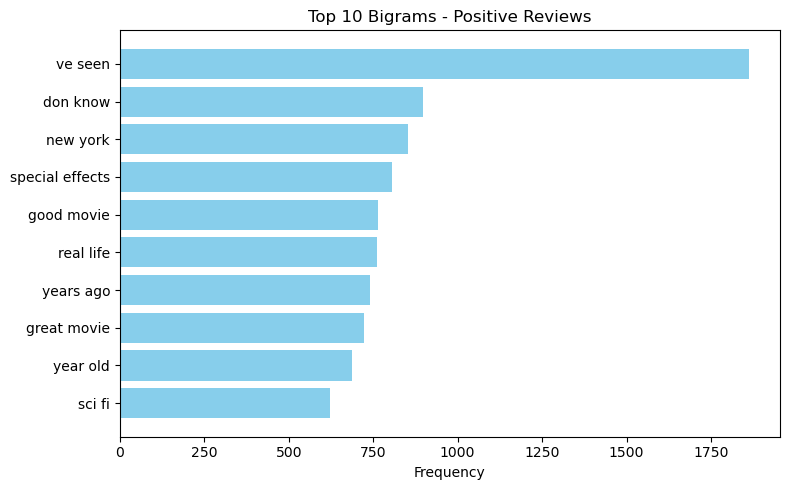

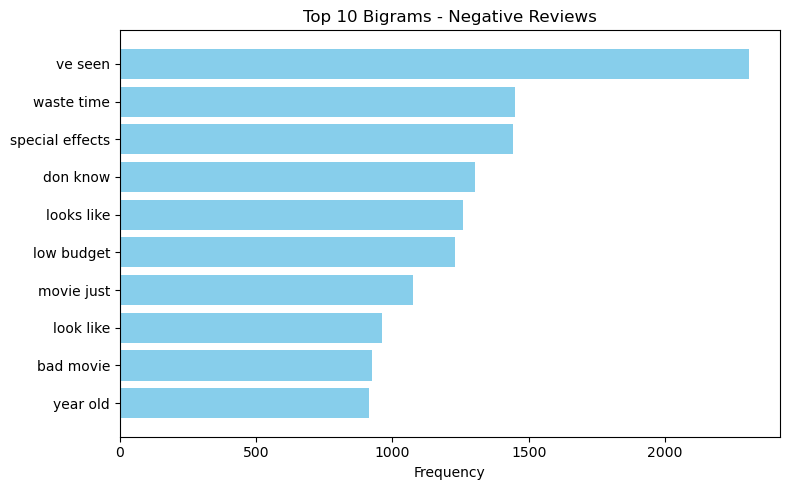

In [21]:
# -------------------------------
# Import Libraries
# -------------------------------
from sklearn.feature_extraction.text import CountVectorizer


# -------------------------------
# Define Save Path
# -------------------------------

save_pos = path + "\\bigram_positive.png"
save_neg = path + "\\bigram_negative.png"

# -------------------------------
# Function to Plot Top N Bigrams
# -------------------------------
def plot_top_ngrams(text_series, n=10, ngram_range=(2,2), title="", save_path=None):
    # Create CountVectorizer for bigrams/trigrams
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(text_series)
    
    # Sum frequencies and get top n
    freqs = X.sum(axis=0).A1
    terms = vectorizer.get_feature_names_out()
    df_freq = pd.DataFrame({'ngram': terms, 'count': freqs}).sort_values(by='count', ascending=False).head(n)
    
    # Plot
    plt.figure(figsize=(8,5))
    plt.barh(df_freq['ngram'][::-1], df_freq['count'][::-1], color='skyblue')
    plt.title(title)
    plt.xlabel("Frequency")
    plt.tight_layout()
    
    # Save if path provided
    if save_path:
        plt.savefig(save_path, dpi=300)
    plt.show()

# -------------------------------
# Positive Reviews - Top 10 Bigrams
# -------------------------------
plot_top_ngrams(
    df[df['sentiment_binary']==1]['clean_review'],
    n=10,
    ngram_range=(2,2),
    title="Top 10 Bigrams - Positive Reviews",
    save_path=save_pos
)

# -------------------------------
# Negative Reviews - Top 10 Bigrams
# -------------------------------
plot_top_ngrams(
    df[df['sentiment_binary']==0]['clean_review'],
    n=10,
    ngram_range=(2,2),
    title="Top 10 Bigrams - Negative Reviews",
    save_path=save_neg
)


# 🧠 Traditional Machine Learning Methods 

### 🧮 Feature Engineering — TF–IDF
- **Method:** TF–IDF vectorization with unigrams and bigrams (`ngram_range=(1,2)`).
- **Feature Limit:** 10,000 most informative tokens for efficiency.
- **Result:** Transformed training and testing matrices ready for classical models like Naïve Bayes or SVM.


In [22]:
# Fit on training data and transform both train & test
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# print result 

print("TF-IDF training matrix shape:", X_train_tfidf.shape)
print("TF-IDF testing matrix shape:", X_test_tfidf.shape)

TF-IDF training matrix shape: (40000, 10000)
TF-IDF testing matrix shape: (10000, 10000)


## 🏋️‍♂️ Model Training

- **Naïve Bayes (MultinomialNB):** Trained on TF-IDF features for text classification.  
- **Support Vector Machine (LinearSVC):** Also trained on the same TF-IDF features.  
- **Optional Exploration:** Logistic Regression, Decision Tree, or K-Means can be tried for comparison, but are not required for final evaluation.  

Purpose: Demonstrates classical ML model training on vectorized text features.


In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)  # train

# Linear Support Vector Machine
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

print("Training done for both model")



Training done for both model


## 🔍 Model Evaluation

- **Predictions:** Naïve Bayes and Linear SVM predict sentiment on the test set.  
- **Metrics:** Accuracy, Precision, Recall, and F1-score are calculated for both models.  
- **Confusion Matrices:** Visualize how well each model classifies positive and negative reviews.  
- **Optional ROC Curve:** Shows classifier separation performance for binary classification (good for bonus discussion).


--- Naïve Bayes ---
Accuracy : 0.8647
Precision: 0.8529127153086897
Recall   : 0.8814
F1-Score : 0.8669223959870168

--- Linear SVM ---
Accuracy : 0.8906
Precision: 0.8867326732673267
Recall   : 0.8956
F1-Score : 0.8911442786069652



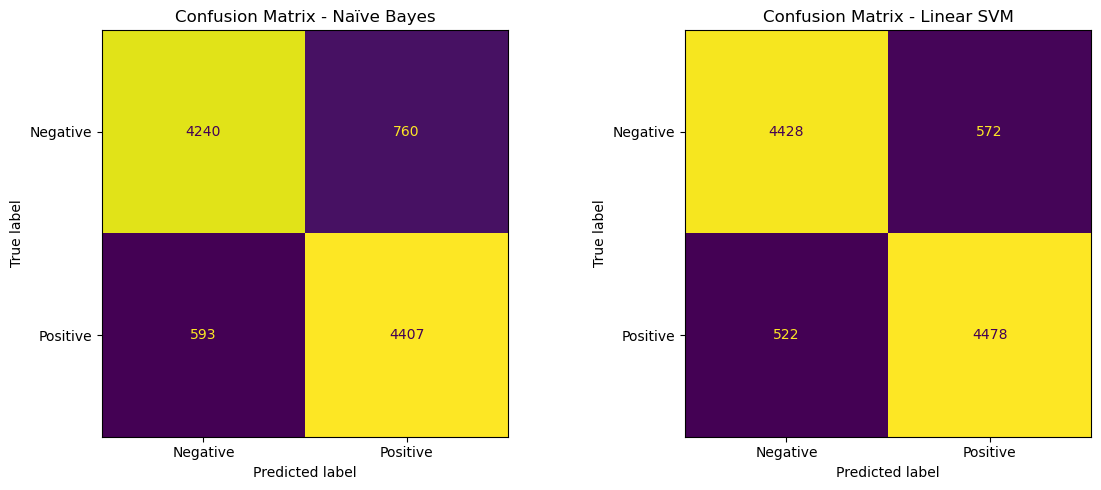

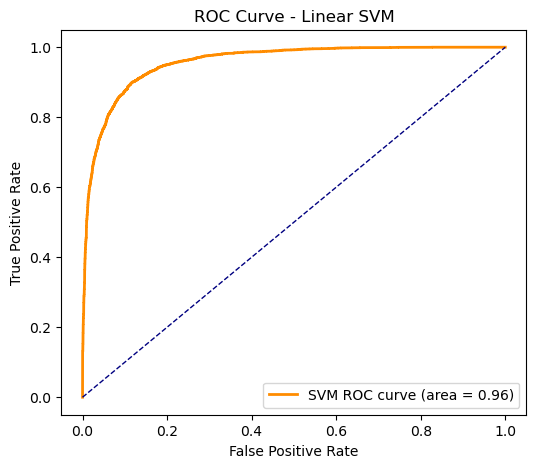

In [21]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc


# Predict on Test Set

y_pred_nb = nb_model.predict(X_test_tfidf)
y_pred_svm = svm_model.predict(X_test_tfidf)

# -------------------------------
# Calculate Metrics
# -------------------------------
def print_metrics(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1-Score :", f1_score(y_true, y_pred))
    print()

print_metrics(y_test, y_pred_nb, "Naïve Bayes")
print_metrics(y_test, y_pred_svm, "Linear SVM")

# -------------------------------
# Confusion Matrices
# -------------------------------
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_svm = confusion_matrix(y_test, y_pred_svm)

save = path + "\\Confusion Matrix.png"

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
ConfusionMatrixDisplay(cm_nb, display_labels=['Negative', 'Positive']).plot(ax=plt.gca(), colorbar=False)
plt.title("Confusion Matrix - Naïve Bayes")

plt.subplot(1,2,2)
ConfusionMatrixDisplay(cm_svm, display_labels=['Negative', 'Positive']).plot(ax=plt.gca(), colorbar=False)
plt.title("Confusion Matrix - Linear SVM")

plt.tight_layout()
plt.savefig(save)
plt.show()

# -------------------------------
# ROC Curve (Binary Classification)
# -------------------------------

# For LinearSVC, decision_function can be used
y_score_svm = svm_model.decision_function(X_test_tfidf)
fpr, tpr, thresholds = roc_curve(y_test, y_score_svm)
roc_auc = auc(fpr, tpr)

save = path + "\\ROC Curve.png"

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'SVM ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Linear SVM')
plt.legend(loc="lower right")
plt.savefig(save)
plt.show()


## ⚖️ Baseline Comparison

- **Majority Class Baseline:** Always predicts the most frequent sentiment from the training set.  
- **Purpose:** Provides a simple reference to compare model performance.  
- **Comparison:** Accuracy of Naïve Bayes and Linear SVM should exceed the baseline, showing that the models learn meaningful patterns from the data.


In [22]:
# Determine majority class in training data
majority_class = y_train.mode()[0]

# Predict the majority class for all test samples
y_pred_baseline = np.full_like(y_test, fill_value = majority_class)

# Accuracy comparison
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
acc_nb = accuracy_score(y_test, y_pred_nb)
acc_svm = accuracy_score(y_test, y_pred_svm)

print(f"Baseline Accuracy (Majority Class): {accuracy_baseline:.4f}")
print(f"Naïve Bayes Accuracy: {acc_nb:.4f}")
print(f"Linear SVM Accuracy: {acc_svm:.4f}")

Baseline Accuracy (Majority Class): 0.5000
Naïve Bayes Accuracy: 0.8647
Linear SVM Accuracy: 0.8906


## 📊 Performance Comparison Bar Chart

**Description:**  
Bar chart comparing Accuracy, Precision, Recall, and F1-score for **Naïve Bayes**, **Linear SVM**, and **Baseline (majority class)**.

**Purpose:**  
- Provides a **direct visual comparison** of model performance across multiple metrics.  
- Clearly demonstrates how **SVM outperforms Naïve Bayes** (if applicable).  
- Shows improvement over the **Baseline**, justifying the use of trained models.  

**Placement in Report:**  
- End of the evaluation section, after confusion matrices and discussion of metrics.


C:\Users\Harashaa Harshini\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


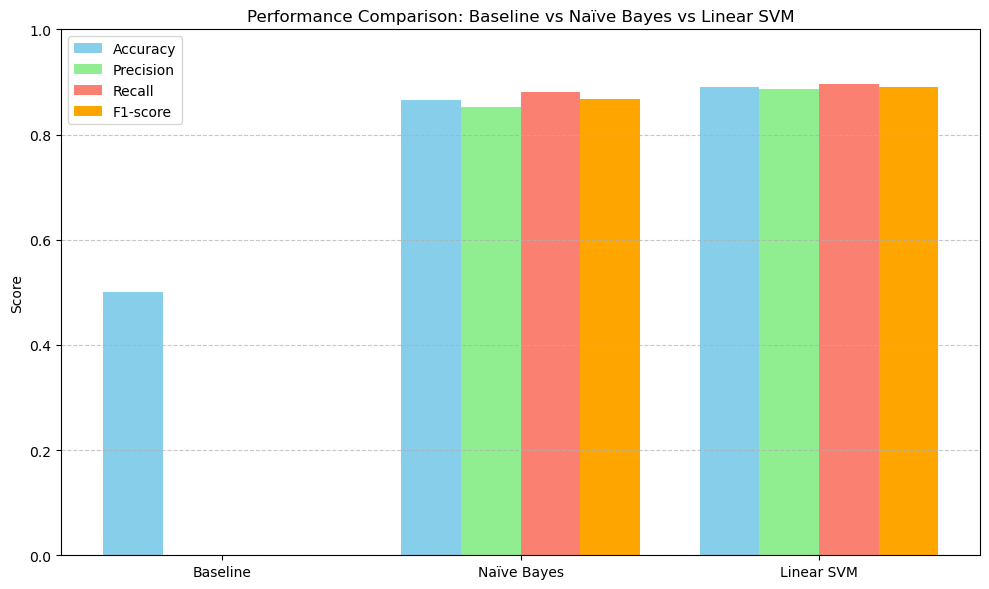

Performance comparison bar chart saved at: C:\Users\Harashaa Harshini\OneDrive\Desktop\MSC Assignments\applied AI\Performance_Comparison.png


In [27]:

# -------------------------------
# 1️⃣ Compute Metrics
# -------------------------------
metrics = {
    "Baseline": [
        accuracy_score(y_test, y_pred_baseline),
        precision_score(y_test, y_pred_baseline),
        recall_score(y_test, y_pred_baseline),
        f1_score(y_test, y_pred_baseline)
    ],
    "Naïve Bayes": [
        accuracy_score(y_test, y_pred_nb),
        precision_score(y_test, y_pred_nb),
        recall_score(y_test, y_pred_nb),
        f1_score(y_test, y_pred_nb)
    ],
    "Linear SVM": [
        accuracy_score(y_test, y_pred_svm),
        precision_score(y_test, y_pred_svm),
        recall_score(y_test, y_pred_svm),
        f1_score(y_test, y_pred_svm)
    ]
}

models = list(metrics.keys())
accuracy = [metrics[m][0] for m in models]
precision = [metrics[m][1] for m in models]
recall = [metrics[m][2] for m in models]
f1 = [metrics[m][3] for m in models]

x = np.arange(len(models))
width = 0.2

# -------------------------------
# 2️⃣ Plot Bar Chart
# -------------------------------
plt.figure(figsize=(10,6))
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy', color='skyblue')
plt.bar(x - 0.5*width, precision, width, label='Precision', color='lightgreen')
plt.bar(x + 0.5*width, recall, width, label='Recall', color='salmon')
plt.bar(x + 1.5*width, f1, width, label='F1-score', color='orange')

plt.xticks(x, models)
plt.ylabel('Score')
plt.ylim(0,1)
plt.title('Performance Comparison: Baseline vs Naïve Bayes vs Linear SVM')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# -------------------------------
# 3️⃣ Save Figure
# -------------------------------

save = path + "\\Performance_Comparison.png"
plt.tight_layout()
plt.savefig(save, dpi=300)
plt.show()

print(f"Performance comparison bar chart saved at: {save}")


### 🧾 Displaying Dataset Columns

- **Purpose:** Prints all column names in the dataframe.  
- **Usage:** Helps verify available fields before preprocessing or modelling.  

Useful for ensuring the dataset structure matches the expected pipeline.


In [24]:
print(df.columns)

Index(['review', 'sentiment', 'clean_review', 'classical_tokens',
       'lstm_tokens', 'bert_tokens', 'bert_tokens_id', 'clean_no_stopwords',
       'clean_with_stopwords', 'lemmatized_text', 'sentiment_binary'],
      dtype='object')


# 🔬 Deep Learning 

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

### 🧠 Preparing LSTM Input Tensors

- **Index Alignment:** Uses the indices of `X_train` and `X_test` to ensure the token arrays match the original train–test split.  
- **Token Stacking:** Converts stored token sequences (`lstm_tokens`) into NumPy arrays suitable for LSTM training.  
- **Label Extraction:** Retrieves the corresponding sentiment labels for training and testing.  

Purpose: Ensures consistent, correctly shaped input tensors for LSTM model training and evaluation.


In [67]:
# Ensure your X_train/X_test are the text Series you created earlier (clean_review)
# Using the index positions of X_train/X_test to pick tokens from df
# This keeps the split consistent with your prior preprocessing.

# Convert series indices to use for selection
train_idx = X_train.index
test_idx = X_test.index

# Stack the numpy arrays stored in df['lstm_tokens'] for train and test
X_train_lstm = np.vstack(df.loc[train_idx, 'lstm_tokens'].values)
X_test_lstm  = np.vstack(df.loc[test_idx,  'lstm_tokens'].values)

# Labels
y_train_lstm = y_train.values
y_test_lstm  = y_test.values

print("X_train_lstm shape:", X_train_lstm.shape)
print("X_test_lstm shape: ", X_test_lstm.shape)
print("y_train_lstm shape:", y_train_lstm.shape)
print("y_test_lstm shape: ", y_test_lstm.shape)


X_train_lstm shape: (40000, 50)
X_test_lstm shape:  (10000, 50)
y_train_lstm shape: (40000,)
y_test_lstm shape:  (10000,)


### 🔍 Inspecting LSTM Tensor Shapes and Consistency

- **Data Type Check:** Confirms the NumPy data type of the LSTM input tensors.  
- **Shape Verification:** Ensures the training matrix has the expected 2D structure.  
- **Row Inspection:** Displays the type and shape of an individual sequence.  
- **Length Consistency:** Confirms all sequences have equal length (required for LSTM input).  

Purpose: Validates that the LSTM input tensors are well-formed and ready for model training.


In [70]:
print("X_train_lstm dtype:", X_train_lstm.dtype)
print("Shape:", X_train_lstm.shape)

print("First row type:", type(X_train_lstm[0]))
print("First row shape:", np.array(X_train_lstm[0]).shape)

# Check if all rows have equal length
lens = [len(row) for row in X_train_lstm]
print("Unique lengths:", set(lens))


X_train_lstm dtype: int32
Shape: (40000, 50)
First row type: <class 'numpy.ndarray'>
First row shape: (50,)
Unique lengths: {50}


### 🧱 Building the LSTM Model Architecture

- **Embedding Layer:** Converts integer token sequences into dense vector representations.  
- **LSTM Layer:** Learns sequential patterns and long-range dependencies from the text.  
- **Dropout:** Reduces overfitting by randomly disabling units during training.  
- **Dense Output:** A single sigmoid neuron for binary sentiment prediction.  

Purpose: Constructs a complete LSTM-based sentiment classifier with defined vocabulary size, embedding dimension, and model parameters.


In [71]:
vocab_size = 5000
embedding_dim = 64
max_len = X_train_lstm.shape[1]   # should be 50
lstm_units = 128

model = Sequential([
    tf.keras.Input(shape=(max_len,)),   # <-- explicitly define input shape
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    LSTM(lstm_units),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 50, 64)         │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 418,945 (1.60 MB)

 Trainable params: 418,945 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

### 🛠️ Training LSTM with Callbacks

- **Early Stopping:** Monitors validation loss and stops training when performance stops improving.  
- **Model Checkpoint:** Saves the best LSTM model based on validation loss during training.  
- **Training Loop:** Fits the model with validation split, batch size, and callbacks applied.  

Purpose: Ensures stable training, prevents overfitting, and preserves the best-performing LSTM model.


In [72]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

checkpoint_path = "best_lstm_model.h5"
checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

history = model.fit(
    X_train_lstm, y_train_lstm,
    validation_split=0.2,
    epochs=12,
    batch_size=64,
    callbacks=[early_stop, checkpoint],
    verbose=2
)


Epoch 1/12

Epoch 1: val_loss improved from None to 0.43199, saving model to best_lstm_model.h5


500/500 - 55s - 110ms/step - accuracy: 0.7660 - loss: 0.4806 - val_accuracy: 0.7962 - val_loss: 0.4320
Epoch 2/12

Epoch 2: val_loss did not improve from 0.43199
500/500 - 50s - 100ms/step - accuracy: 0.8319 - loss: 0.3811 - val_accuracy: 0.7897 - val_loss: 0.4799
Epoch 3/12

Epoch 3: val_loss did not improve from 0.43199
500/500 - 51s - 102ms/step - accuracy: 0.8570 - loss: 0.3364 - val_accuracy: 0.7966 - val_loss: 0.4718
Epoch 4/12

Epoch 4: val_loss did not improve from 0.43199
500/500 - 1233s - 2s/step - accuracy: 0.8750 - loss: 0.2978 - val_accuracy: 0.7962 - val_loss: 0.4860
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.


### 📐 LSTM Model Predictions and Metrics

- **Prediction:** Generates probability outputs and converts them into binary sentiment labels.  
- **Evaluation Metrics:** Computes accuracy, precision, recall, and F1-score on the test set.  
- **Performance Summary:** Prints key metrics to assess the effectiveness of the trained LSTM model.  

Purpose: Provides a clear performance evaluation of the LSTM classifier on unseen data.


In [73]:
# Predict
y_pred_prob = model.predict(X_test_lstm, batch_size=128).ravel()
y_pred = (y_pred_prob >= 0.5).astype(int)

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc_lstm  = accuracy_score(y_test_lstm, y_pred)
prec_lstm = precision_score(y_test_lstm, y_pred)
rec_lstm  = recall_score(y_test_lstm, y_pred)
f1_lstm   = f1_score(y_test_lstm, y_pred)

print("LSTM Test Accuracy :", acc_lstm)
print("LSTM Test Precision:", prec_lstm)
print("LSTM Test Recall   :", rec_lstm)
print("LSTM Test F1       :", f1_lstm)


79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step
LSTM Test Accuracy : 0.8071
LSTM Test Precision: 0.7646957421134287
LSTM Test Recall   : 0.8872
LSTM Test F1       : 0.8214054254235719


### 🔍 Inspecting BERT Token IDs

- **First Element:** Displays the token ID sequence for the first review.  
- **Data Type Check:** Confirms the Python type of the stored token list.  
- **Length Check:** Shows the number of tokens generated for the review.  

Purpose: Verifies that BERT tokenization is working correctly and producing consistent sequence lengths.


In [36]:
df['bert_tokens_id'].iloc[0]
type(df['bert_tokens_id'].iloc[0])
len(df['bert_tokens_id'].iloc[0])


332

In [41]:
# If transformers/torch not installed, uncomment:
# !pip install transformers torch accelerate

import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset, RandomSampler, SequentialSampler
from transformers import BertForSequenceClassification, BertTokenizerFast, get_linear_schedule_with_warmup
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import time, datetime
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("PyTorch device:", device)
from torch.optim import AdamW



PyTorch device: cuda


### 🧬 Preparing BERT Input Sequences

- **Padding & Truncation:** Ensures all BERT token sequences have a fixed length (`max_len`) for model input.  
- **Input IDs:** Converts token ID lists into a padded NumPy array suitable for batching.  
- **Attention Masks:** Generates binary masks indicating which tokens are real (1) and which are padding (0).  

Purpose: Creates uniformly shaped input tensors required for BERT-based model training and evaluation.


In [42]:
# Choose a max_len; 256 or 512 depending on VRAM. Start with 256.
max_len = 256

def pad_truncate(ids, max_len):
    if len(ids) >= max_len:
        return ids[:max_len]
    else:
        return ids + [0] * (max_len - len(ids))  # pad token id = 0 for bert tokenizer

# Create padded input ids and attention masks for full df
input_ids_all = np.array([pad_truncate(list(map(int, ids)), max_len) for ids in df['bert_tokens_id'].values], dtype=np.int64)
attention_masks_all = np.where(input_ids_all != 0, 1, 0).astype(np.int64)

print("input_ids_all shape:", input_ids_all.shape)
print("attention_masks_all shape:", attention_masks_all.shape)


input_ids_all shape: (50000, 256)
attention_masks_all shape: (50000, 256)


### 🔧 Splitting BERT Input Tensors into Train and Test Sets

- **Index Alignment:** Uses the same train/test indices as earlier preprocessing steps to ensure consistency.  
- **Input IDs & Masks:** Extracts the padded token IDs and attention masks for training and testing.  
- **Label Conversion:** Converts sentiment labels to integer format for BERT compatibility.  

Purpose: Prepares correctly aligned input tensors and labels for training and evaluating the BERT model.


In [43]:
# Use the same train_idx/test_idx you used earlier
train_idx = X_train.index
test_idx  = X_test.index

X_train_ids = input_ids_all[train_idx]
X_train_masks = attention_masks_all[train_idx]
y_train_bert = y_train.values.astype(np.int64)

X_test_ids = input_ids_all[test_idx]
X_test_masks = attention_masks_all[test_idx]
y_test_bert = y_test.values.astype(np.int64)

print("Train shapes:", X_train_ids.shape, X_train_masks.shape, y_train_bert.shape)
print("Test shapes: ", X_test_ids.shape, X_test_masks.shape, y_test_bert.shape)


Train shapes: (40000, 256) (40000, 256) (40000,)
Test shapes:  (10000, 256) (10000, 256) (10000,)


### 🧩 Creating BERT Dataset and DataLoaders

- **Custom Dataset:** Wraps input IDs, attention masks, and labels into a PyTorch `Dataset` class for easy indexing.  
- **Tensor Conversion:** Converts all inputs into PyTorch tensors required by the BERT model.  
- **DataLoaders:** Creates training, validation, and test loaders with appropriate samplers.  

Purpose: Organises BERT input tensors into efficient mini-batches for training, validation, and evaluation.


In [44]:
class SimpleBERTDataset(Dataset):
    def __init__(self, input_ids, attention_masks, labels):
        self.input_ids = torch.tensor(input_ids, dtype=torch.long)
        self.attention_masks = torch.tensor(attention_masks, dtype=torch.long)
        self.labels = torch.tensor(labels, dtype=torch.long)
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_masks[idx],
            'labels': self.labels[idx]
        }

batch_size = 8   # safe default; increase to 16/32 if GPU memory allows

train_dataset = SimpleBERTDataset(X_train_ids, X_train_masks, y_train_bert)
test_dataset  = SimpleBERTDataset(X_test_ids,  X_test_masks,  y_test_bert)

train_loader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)
val_loader   = DataLoader(train_dataset, sampler=SequentialSampler(train_dataset), batch_size=batch_size)  # used for inside-epoch val if needed
test_loader  = DataLoader(test_dataset,  sampler=SequentialSampler(test_dataset),  batch_size=batch_size)

print("train batches:", len(train_loader), "test batches:", len(test_loader))


train batches: 5000 test batches: 1250


Model, optimizer, scheduler setup

### 🚀 Initializing BERT Classifier and Training Setup

- **Model Loading:** Imports a pre-trained `bert-base-uncased` model for binary sequence classification.  
- **Device Placement:** Moves the model to GPU or CPU depending on availability.  
- **Optimizer:** Uses AdamW, the recommended optimizer for transformer models.  
- **Scheduler:** Applies a linear warmup–decay learning rate schedule based on total training steps.  

Purpose: Sets up the BERT model, optimizer, and learning-rate scheduler required for fine-tuning.


In [45]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model.to(device)

# Optimizer & scheduler
epochs = 3
total_steps = len(train_loader) * epochs

optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps = int(0.1*total_steps), num_training_steps = total_steps)

print("Model loaded and optimizer/scheduler created.")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model loaded and optimizer/scheduler created.


### ⚙️ Fine-Tuning BERT with Training and Validation Loops

- **Epoch Loop:** Trains the model across multiple epochs while tracking progress.  
- **Training Phase:** Computes loss, performs backpropagation, applies gradient clipping, and updates model parameters.  
- **Validation Phase:** Evaluates the model on a validation subset to monitor generalisation.  
- **Best Model Saving:** Stores the model checkpoint whenever a new lowest validation loss is achieved.  

Purpose: Executes full BERT fine-tuning with dynamic learning-rate scheduling, validation monitoring, and best-model checkpointing.


In [46]:
def format_time(elapsed):
    return str(datetime.timedelta(seconds=int(round((elapsed)))))

train_losses = []
val_losses = []

best_val_loss = float('inf')
best_model_path = "best_bert_model.pt"

for epoch_i in range(epochs):
    print(f"\n======== Epoch {epoch_i+1}/{epochs} ========")
    t0 = time.time()
    model.train()
    total_train_loss = 0.0

    for step, batch in enumerate(train_loader):
        b_input_ids = batch['input_ids'].to(device)
        b_input_mask = batch['attention_mask'].to(device)
        b_labels = batch['labels'].to(device)

        model.zero_grad()
        outputs = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs.loss
        logits = outputs.logits
        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

        if (step+1) % 200 == 0:
            print(f"  Batch {step+1}/{len(train_loader)} - Avg loss: {total_train_loss/(step+1):.4f}")

    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f"  Average training loss: {avg_train_loss:.4f}")
    print("  Training epoch took:", format_time(time.time()-t0))

    # Validation on a small subset (to save time) – evaluate on full train_dataset sequentially as val
    model.eval()
    total_eval_loss = 0.0
    for batch in val_loader:
        b_input_ids = batch['input_ids'].to(device)
        b_input_mask = batch['attention_mask'].to(device)
        b_labels = batch['labels'].to(device)
        with torch.no_grad():
            outputs = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)
            loss = outputs.loss
            total_eval_loss += loss.item()
    avg_val_loss = total_eval_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    print(f"  Validation loss: {avg_val_loss:.4f}")

    # Save best model by val loss
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), best_model_path)
        print("  Best model saved to", best_model_path)



======== Epoch 1/3 ========
  Batch 200/5000 - Avg loss: 0.7147
  Batch 400/5000 - Avg loss: 0.6164
  Batch 600/5000 - Avg loss: 0.5352
  Batch 800/5000 - Avg loss: 0.4884
  Batch 1000/5000 - Avg loss: 0.4563
  Batch 1200/5000 - Avg loss: 0.4367
  Batch 1400/5000 - Avg loss: 0.4220
  Batch 1600/5000 - Avg loss: 0.4134
  Batch 1800/5000 - Avg loss: 0.4031
  Batch 2000/5000 - Avg loss: 0.3928
  Batch 2200/5000 - Avg loss: 0.3879
  Batch 2400/5000 - Avg loss: 0.3825
  Batch 2600/5000 - Avg loss: 0.3783
  Batch 2800/5000 - Avg loss: 0.3739
  Batch 3000/5000 - Avg loss: 0.3706
  Batch 3200/5000 - Avg loss: 0.3660
  Batch 3400/5000 - Avg loss: 0.3611
  Batch 3600/5000 - Avg loss: 0.3570
  Batch 3800/5000 - Avg loss: 0.3527
  Batch 4000/5000 - Avg loss: 0.3487
  Batch 4200/5000 - Avg loss: 0.3467
  Batch 4400/5000 - Avg loss: 0.3454
  Batch 4600/5000 - Avg loss: 0.3412
  Batch 4800/5000 - Avg loss: 0.3389
  Batch 5000/5000 - Avg loss: 0.3381
  Average training loss: 0.3381
  Training epoch t

### 📐 Evaluating the Fine-Tuned BERT Model

- **Model Loading:** Restores the best-performing BERT checkpoint saved during training.  
- **Prediction Loop:** Generates logits, probabilities, and final binary predictions on the test set.  
- **Metric Calculation:** Computes accuracy, precision, recall, F1-score, and ROC–AUC for test performance.  
- **Result Storage:** Saves predictions and probabilities for downstream visualisation and comparison.  

Purpose: Assesses the final performance of the fine-tuned BERT classifier on unseen data using standard evaluation metrics.


In [63]:
# load best model
model.load_state_dict(torch.load(best_model_path))
model.to(device)
model.eval()

all_logits = []
all_labels = []

for batch in test_loader:
    b_input_ids = batch['input_ids'].to(device)
    b_input_mask = batch['attention_mask'].to(device)
    b_labels = batch['labels'].to(device)

    with torch.no_grad():
        outputs = model(b_input_ids, attention_mask=b_input_mask)
        logits = outputs.logits

    all_logits.append(logits.cpu().numpy())
    all_labels.append(b_labels.cpu().numpy())

logits = np.concatenate(all_logits, axis=0)
probs = torch.softmax(torch.tensor(logits), dim=1)[:,1].numpy()
y_pred = (probs >= 0.5).astype(int)
y_true = np.concatenate(all_labels, axis=0)

# Store predictions for plotting functions
y_pred_bert = y_pred
y_pred_prob_bert = probs
y_test_bert = y_true  # rename for consistency with LSTM section


# Metrics
acc_bert  = accuracy_score(y_true, y_pred)
prec_bert = precision_score(y_true, y_pred)
rec_bert  = recall_score(y_true, y_pred)
f1_bert   = f1_score(y_true, y_pred)
fpr, tpr, _ = roc_curve(y_true, probs)
roc_auc_bert = auc(fpr, tpr)

print(f"BERT Test Accuracy : {acc_bert:.4f}")
print(f"BERT Test Precision: {prec_bert:.4f}")
print(f"BERT Test Recall   : {rec_bert:.4f}")
print(f"BERT Test F1       : {f1_bert:.4f}")
print(f"BERT Test AUC      : {roc_auc_bert:.4f}")


BERT Test Accuracy : 0.9282
BERT Test Precision: 0.9240
BERT Test Recall   : 0.9332
BERT Test F1       : 0.9286
BERT Test AUC      : 0.9789


### 🧰 Plotting Utilities for Model Evaluation

- **Confusion Matrix:** Generates and saves a heatmap showing true vs. predicted labels.  
- **ROC Curve:** Plots the model’s discrimination ability and computes AUC.  
- **LSTM Learning Curves:** Visualises training and validation loss/accuracy across epochs.  
- **BERT Loss Curves:** Displays epoch-wise loss trends for the fine-tuned BERT model.  
- **Master Function:** Automatically creates and saves all relevant plots for a given model.  

Purpose: Provides reusable plotting functions to evaluate, compare, and visualise model performance in a structured and consistent way.


In [58]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# ============================================================
# Utility: create directory if it doesn't exist
# ============================================================
def ensure_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)


# ============================================================
# 1. Confusion Matrix
# ============================================================
def plot_confusion_matrix(model_name, y_true, y_pred, save_path):
    ensure_dir(save_path)
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{model_name.upper()} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    filename = f"{model_name}_confusion_matrix.png"
    full_path = os.path.join(save_path, filename)
    plt.savefig(full_path, dpi=300, bbox_inches='tight')

    plt.show()   # <<< SHOW PLOT IN NOTEBOOK


# ============================================================
# 2. ROC Curve
# ============================================================
def plot_roc_curve(model_name, y_true, y_pred_prob, save_path):
    ensure_dir(save_path)
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}", linewidth=2)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{model_name.upper()} ROC Curve")
    plt.legend()

    filename = f"{model_name}_roc_curve.png"
    full_path = os.path.join(save_path, filename)
    plt.savefig(full_path, dpi=300, bbox_inches='tight')

    plt.show()   # <<< SHOW IN NOTEBOOK


# ============================================================
# 3. LSTM Learning Curves (Keras history)
# ============================================================
def plot_lstm_learning_curves(model_name, history, save_path):
    ensure_dir(save_path)

    # Loss curve
    plt.figure(figsize=(7,5))
    plt.plot(history.history['loss'], label="Train Loss")
    plt.plot(history.history['val_loss'], label="Validation Loss")
    plt.title(f"{model_name.upper()} LSTM Loss Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    loss_path = os.path.join(save_path, f"{model_name}_loss_curve.png")
    plt.savefig(loss_path, dpi=300, bbox_inches='tight')

    plt.show()

    # Accuracy curve
    plt.figure(figsize=(7,5))
    plt.plot(history.history['accuracy'], label="Train Accuracy")
    plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
    plt.title(f"{model_name.upper()} LSTM Accuracy Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    acc_path = os.path.join(save_path, f"{model_name}_accuracy_curve.png")
    plt.savefig(acc_path, dpi=300, bbox_inches='tight')

    plt.show()


# ============================================================
# 4. BERT Loss Curves
# ============================================================
def plot_bert_loss_curves(model_name, train_losses, val_losses, save_path):
    ensure_dir(save_path)

    plt.figure(figsize=(7,5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title(f"{model_name.upper()} BERT Loss Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    loss_path = os.path.join(save_path, f"{model_name}_bert_loss_curve.png")
    plt.savefig(loss_path, dpi=300, bbox_inches='tight')

    plt.show()


# ============================================================
# 5. MASTER FUNCTION — saves AND shows everything
# ============================================================
def save_all_plots(model_name, y_true, y_pred, y_pred_prob, history_or_losses, save_path):
    """
    model_name: 'lstm' or 'bert'
    history_or_losses:
        - LSTM => keras History object
        - BERT => (train_losses, val_losses)
    """
    plot_confusion_matrix(model_name, y_true, y_pred, save_path)
    plot_roc_curve(model_name, y_true, y_pred_prob, save_path)

    if model_name.lower() == "lstm":
        plot_lstm_learning_curves(model_name, history_or_losses, save_path)
    else:
        train_losses, val_losses = history_or_losses
        plot_bert_loss_curves(model_name, train_losses, val_losses, save_path)

    print(f"All {model_name.upper()} plots displayed and saved to: {save_path}")


### 📈 LSTM Evaluation Plots

- **Confusion Matrix:** Actual vs. predicted labels.  
- **ROC Curve:** TPR–FPR performance with AUC.  
- **Learning Curves:** Training and validation trends.  

Purpose: Quickly visualises LSTM performance and saves all plots.


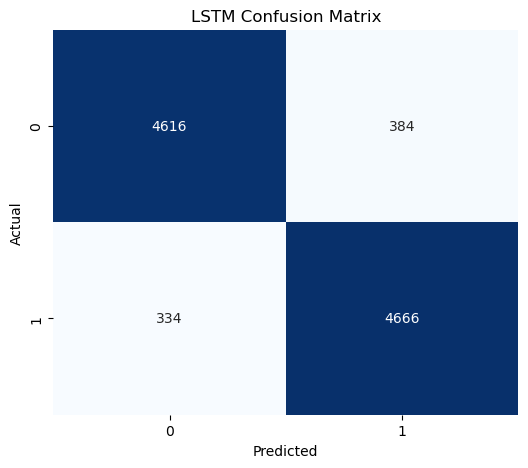

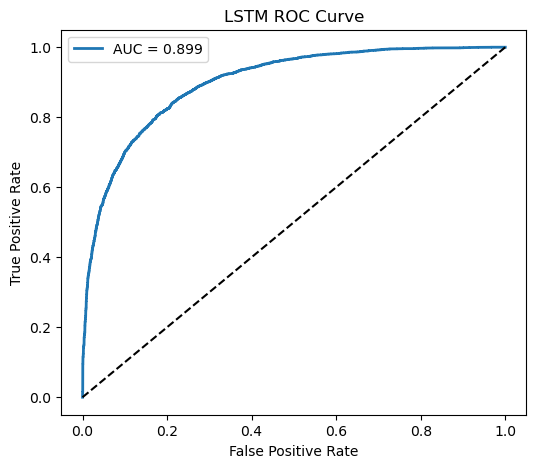

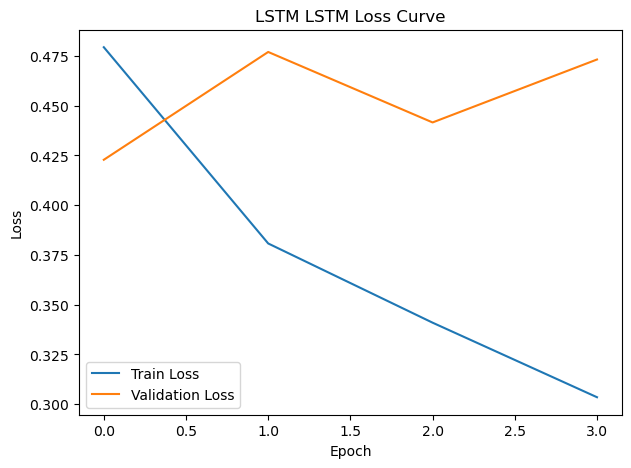

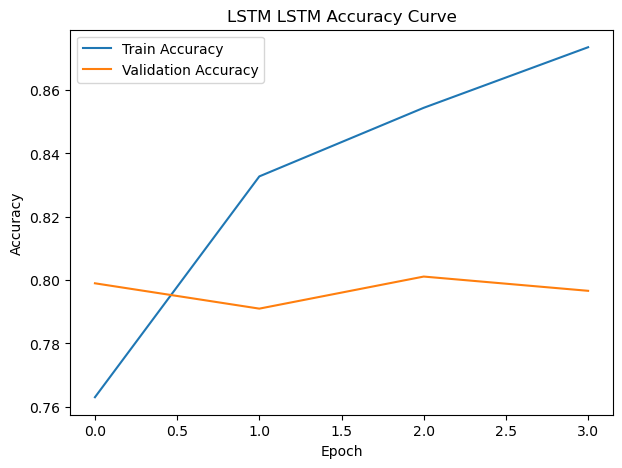

All LSTM plots displayed and saved to: C:\Users\Harashaa Harshini\OneDrive\Desktop\MSC Assignments\applied AI


In [59]:
save_all_plots(
    model_name="lstm",
    y_true=y_test_lstm,
    y_pred=y_pred,
    y_pred_prob=y_pred_prob,
    history_or_losses=history,
    save_path = path
)


### 📈 BERT Evaluation Plots

- **Confusion Matrix:** Actual vs. predicted labels.  
- **ROC Curve:** TPR–FPR curve with AUC score.  
- **Loss Curve:** Training and validation loss across epochs.  

Purpose: Provides a quick visual summary of BERT model performance and saves all plots.


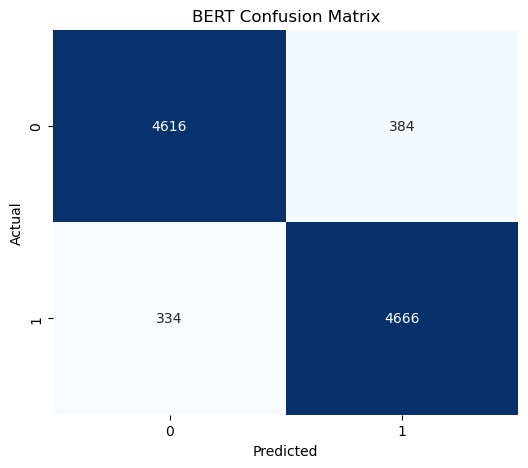

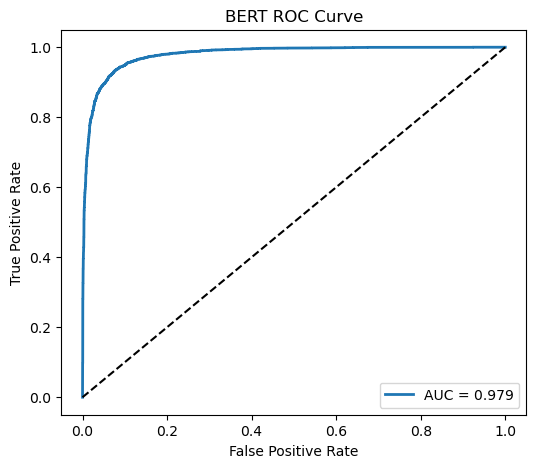

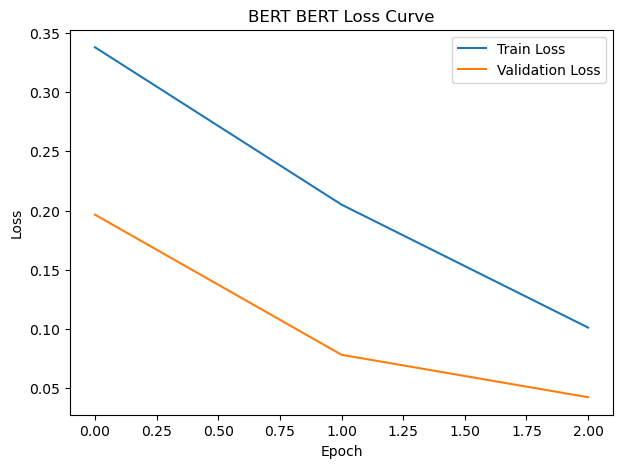

All BERT plots displayed and saved to: C:\Users\Harashaa Harshini\OneDrive\Desktop\MSC Assignments\applied AI


In [78]:
save_all_plots(
    model_name="bert",
    y_true=y_test_bert,
    y_pred=y_pred_bert,
    y_pred_prob=y_pred_prob_bert,
    history_or_losses=(train_losses, val_losses),
    save_path=path
)


### 📊 Baseline Accuracy

- **Calculation:** Computes the accuracy of always predicting the majority class.  
- **Purpose:** Establishes a simple benchmark for model comparison.


In [74]:
baseline_acc = df['sentiment_binary'].value_counts().max() / len(df)


Perfomance comparison

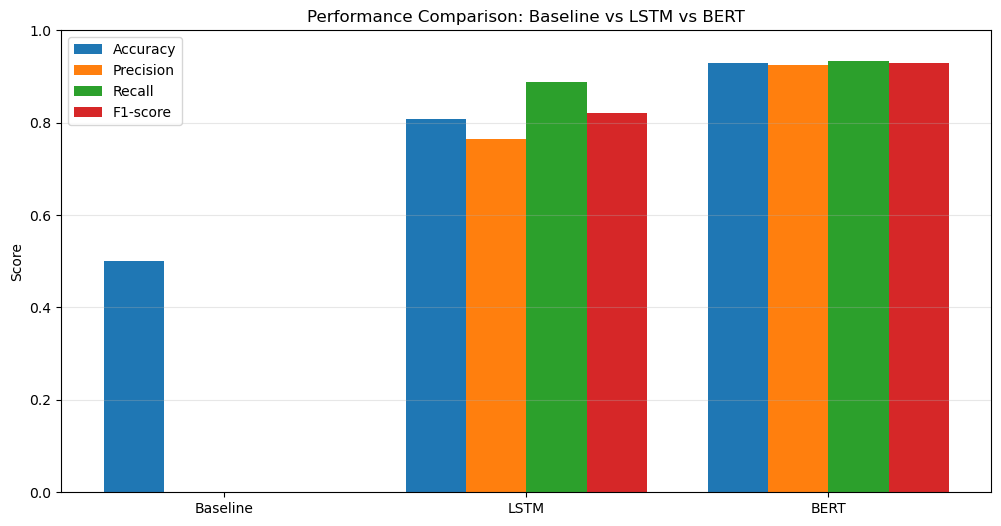

In [77]:

# Categories and values
models = ['Baseline', 'LSTM', 'BERT']

accuracy  = [baseline_acc, acc_lstm, acc_bert]
precision = [0, prec_lstm, prec_bert]   # Baseline has no precision
recall    = [0, rec_lstm, rec_bert]     # Baseline has no recall
f1_score  = [0, f1_lstm, f1_bert]       # Baseline has no F1

x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(12,6))
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy')
plt.bar(x - 0.5*width, precision, width, label='Precision')
plt.bar(x + 0.5*width, recall, width, label='Recall')
plt.bar(x + 1.5*width, f1_score, width, label='F1-score')

plt.ylabel('Score')
plt.title('Performance Comparison: Baseline vs LSTM vs BERT')
plt.xticks(x, models)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.savefig(os.path.join(path, f"Performance comparison deep learning.png"))
plt.show()
